# Graphviz plot of proposed thrombolysis decision-making model

## Set up graph

In [1]:
try:
    from graphviz import Digraph
except:
    !pip install graphviz
    from graphviz import Digraph

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def set_up_graph():

    # Create a directed graph
    g = Digraph(strict=True)

    # Set graph attributes (allow it to go large scale, and set a minimum spacing)
    g.attr(overlap='scale')
    g.attr(sep='0.3')

    # Use custom layout engine if desired (see https://graphviz.org/docs/layouts/)
    # Also see https://graphviz.org/pdf/dot.1.pdf
    #g.attr(layout='neato')

    # Set node attributes
    g.attr('node', shape='circle', fixedsize='true', width='1.3', height='1.2',ordering="out")

    return g


# Notebook (used for file save)
notebook = '01_thrombolysis_decision'

## Set up nodes

In [2]:
# Use a function to create common nodels between two graphs
def create_common_nodes():
    g.node('thrombolysis', label='Thrombolysis\nY/N', penwidth='2', fontname='times bold')
    g.node('hospital', label='Hospital\nattended')
    g.node('nihss', label='Stroke\nseverity')
    g.node('onset', label='Onset\nto arrival\ntime')
    g.node('infarction', label='Infarction')
    g.node('scan', label='Arrival\nto scan\ntime')
    g.node('precise', label='Precise\nonset\ntime?')
    g.node('mrs', label='Prior\ndisability')
    g.node('af', label='Use of AF\nanticoagulants')
    g.node('age', label='Age')
    g.node('sleep', label='Onset\nduring\nsleep')

## Model diagram

In [3]:
# Set up graph and common nodes
g = set_up_graph()
g.attr(layout='neato')
create_common_nodes()

# Define edges
g.edge('nihss', 'thrombolysis')
g.edge('mrs', 'thrombolysis')
g.edge('precise', 'thrombolysis')
g.edge('scan', 'thrombolysis')
g.edge('af', 'thrombolysis')
g.edge('age', 'thrombolysis')
g.edge('sleep', 'thrombolysis')
g.edge('hospital', 'thrombolysis')
g.edge('onset', 'thrombolysis')
g.edge('infarction', 'thrombolysis')

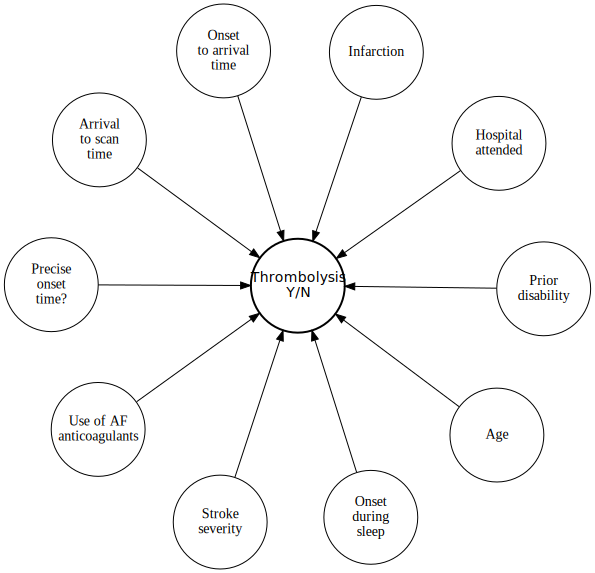

In [4]:
g

## 

In [5]:
# Save the graph as a PNG file
filename = f'./output/{notebook}_model'
g.format = 'png'
g.render(filename, cleanup=True)

'output/01_thrombolysis_decision_model.png'

## Causal diagram

In [6]:
# Clear graph and regenerate common nodes
g.clear()
g = set_up_graph()
g.attr(layout='dot')
create_common_nodes()

# Add new nodes
g.node('patient', label='Thrombolysis\nsuitability\n(0-1)')

# Colour node where we do not have data as grey
g.node('bp', label='Blood\npressure*', color='darkgrey')

g.edge('nihss', 'patient')
g.edge('mrs', 'patient')
g.edge('scan', 'patient')
g.edge('af', 'patient')
g.edge('age', 'patient')
g.edge('age', 'mrs', style='dashed')
g.edge('sleep', 'patient')
g.edge('precise', 'patient')
g.edge('onset', 'patient')
g.edge('bp', 'patient', color='darkgrey')
g.edge('nihss', 'onset', style='dashed')
g.edge('infarction', 'patient')
g.edge('sleep', 'precise', style='dashed')
g.edge('patient', 'hospital')
g.edge('hospital', 'thrombolysis')

Render using MatPlotLib (to be able to add text)

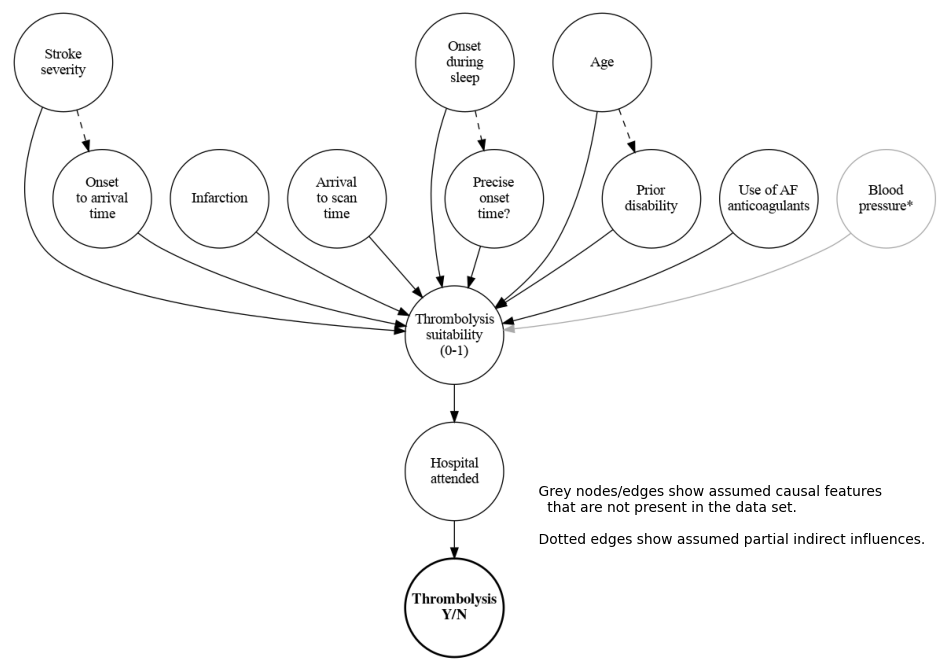

In [7]:
g.render('graph', format='png')
img = mpimg.imread('graph.png')

# Vreate matplotlib outpit
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(111)
ax1.imshow(img)

# Add text
txt = """
    Grey nodes/edges show assumed causal features
      that are not present in the data set.

    Dotted edges show assumed partial indirect influences.
    """ 

ax1.text(650,700, txt)

plt.axis('off')
filename = f'./output/{notebook}_causal'
plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0.2)
plt.show()

## Notes

* `Thrombolysis suitability` or `Thrombolysis Y\N` may be seen as colliders, so if analysis is conditioned on `Thrombolysis Y\N` output from model spurious relationships may be found (e.g. for high probability of receiving thrombolysis, any feature which would contribute to a lower probability of receiving thrombolysis must be compensated for by a feature(s) which contribute a higher probability of receiving thrombolysis), setting up the potential for an apparent inverse correlation.

* Should we remove confounding between `Onset during sleep` and `Precise onset time`?

* Does `Stroke severity` effect `Arrival to scan time`? (Was not picked up as a signifcant correlation in linear regression).